<a href="https://colab.research.google.com/github/MBrandao07/Decision_tree_classifier/blob/main/Initial_Model_Diabetes_Prediction_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Bases de Dados Projetos/Kaggle_Diabetes/diabetes.csv')
df.shape

(768, 9)

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df_backup = df.copy()

## **Data Prep**

In [5]:
# verificando as colunas do df
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# retirando a coluna target
df_01 = df.drop('Outcome', axis=1)
df_01.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [7]:
def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='percent_nulos',ascending=False)
    metadata = metadata.reset_index(drop=True)

    return metadata

In [8]:
metadata_df = generate_metadata(df_01)
metadata_df

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,Pregnancies,int64,0,0.0,17
1,Glucose,int64,0,0.0,136
2,BloodPressure,int64,0,0.0,47
3,SkinThickness,int64,0,0.0,51
4,Insulin,int64,0,0.0,186
5,BMI,float64,0,0.0,248
6,DiabetesPedigreeFunction,float64,0,0.0,517
7,Age,int64,0,0.0,52


#### **Verificando e tratando os valores nulos**

<Axes: >

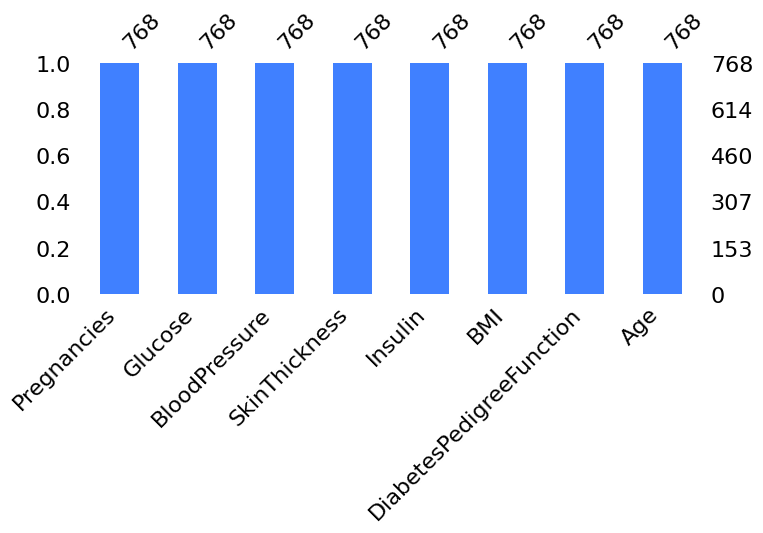

In [9]:
# como temos somente algumas colunas, então podemos verificar a quantidade de nulos graficamente
import missingno as msno
msno.bar(df_01, color=(0.25, 0.5, 1), figsize=(8, 3))

**Não existem valores nulos nesta base de dados, então não precisamos trata-los**

### **Padronizando as colunas numéricas**

In [10]:
from sklearn.preprocessing import StandardScaler

# Instanciando o scaler
scaler = StandardScaler()

# Ajustando e transformando os dados

# Selecionando colunas numéricas
numeric_cols = df_01.select_dtypes(include=['float64', 'int64','int32']).columns

# Aplicando a normalização
df_01[numeric_cols] = scaler.fit_transform(df_01[numeric_cols])
df_01.shape

(768, 8)

In [11]:
df_01.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
5,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760
6,-0.250952,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111
7,1.827813,-0.184482,-3.572597,-1.288212,-0.692891,0.419775,-1.020427,-0.360847
8,-0.547919,2.381884,0.046245,1.534551,4.021922,-0.189437,-0.947944,1.681259
9,1.233880,0.128489,1.390387,-1.288212,-0.692891,-4.060474,-0.724455,1.766346


### **Retornando a coluna target ao dataframe**

In [12]:
df_modelo = pd.merge(df_01, df[['Outcome']], left_index=True, right_index=True)
df_modelo.shape

(768, 9)

In [13]:
df_modelo.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
5,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760,0
6,-0.250952,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111,1
7,1.827813,-0.184482,-3.572597,-1.288212,-0.692891,0.419775,-1.020427,-0.360847,0
8,-0.547919,2.381884,0.046245,1.534551,4.021922,-0.189437,-0.947944,1.681259,1
9,1.233880,0.128489,1.390387,-1.288212,-0.692891,-4.060474,-0.724455,1.766346,1


## **Feature Selection**

**Para este projeto iremos utilizar o método Boruta utilizando o modelo Random Forest**

In [14]:
!pip install boruta

In [15]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

# Define o modelo - Random Forest
rf = RandomForestClassifier()

# Define o método Boruta
feat_selector = BorutaPy(
                         rf,
                         n_estimators='auto',
                         verbose=0,
                         random_state=1)

X = df_modelo.drop(axis=1, columns='Outcome')
y = df_modelo.Outcome

# Executa o Boruta
feat_selector.fit(X.values, y)

# Obtém as variáveis selecionadas
selected_features_boruta = X.columns[feat_selector.support_].tolist()

# Treina o modelo com TODAS as variáveis (não apenas as selecionadas)
rf.fit(X, y)

selected_features_boruta

['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']

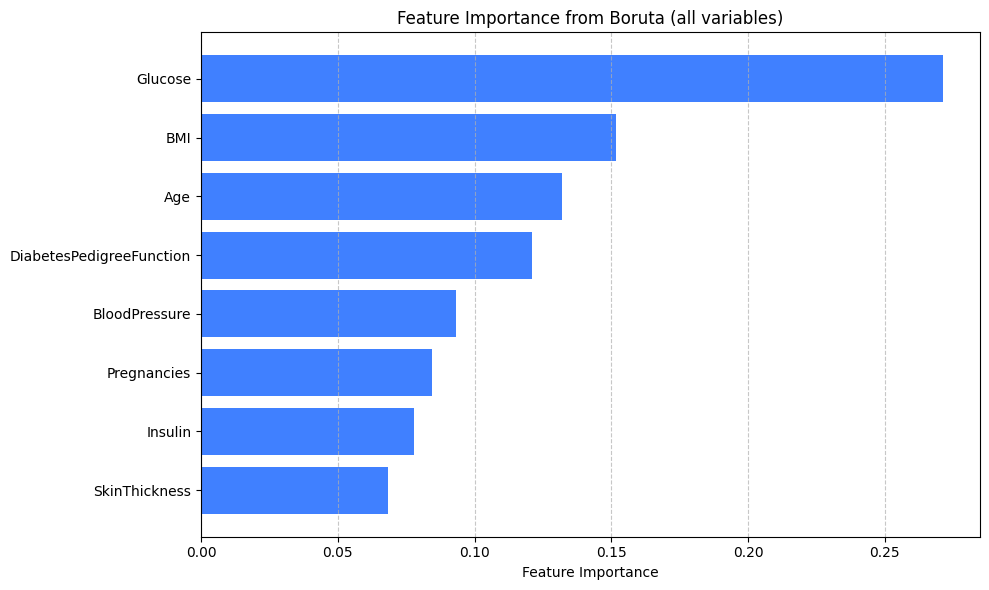

In [16]:
# Supondo que 'feat_selector' é sua instância BorutaPy e 'X' é seu DataFrame de características
importances = rf.feature_importances_
sorted_idx = importances.argsort()
sorted_features = [X.columns[i] for i in sorted_idx]

# Visualizar a importância das variáveis em barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, importances[sorted_idx], color=(0.25, 0.5, 1))
plt.xlabel("Feature Importance")
plt.title("Feature Importance from Boruta (all variables)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
# Pegando somente as variáveis selecionadas e a variável Target
df_02 = df_modelo[selected_features_boruta + ['Outcome']]
df_02.head(10)

,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.848324,0.204013,0.468492,1.425995,1
1,-1.123396,-0.684422,-0.365061,-0.190672,0
2,1.943724,-1.103255,0.604397,-0.105584,1
3,-0.998208,-0.494043,-0.920763,-1.041549,0
4,0.504055,1.409746,5.484909,-0.020496,1
5,-0.153185,-0.811341,-0.818079,-0.275760,0
6,-1.342476,-0.125977,-0.676133,-0.616111,1
7,-0.184482,0.419775,-1.020427,-0.360847,0
8,2.381884,-0.189437,-0.947944,1.681259,1
9,0.128489,-4.060474,-0.724455,1.766346,1


## **Elaboração do modelo**

### **Utilizando o dataframe SEM feature selection**

In [18]:
abt_00 = df_modelo.copy()
abt_00.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [19]:
# Separando as variáveis de entrada (features) e de saída (target)
X_diabetes = abt_00.drop(columns=["Outcome"])
y_diabetes = abt_00["Outcome"]

In [20]:
# Separando uma amostra de 70% para treinar o modelo e 30% para testar o modelo
# Holdout 70/30 (out-of-sample)

from sklearn.model_selection import train_test_split

# Dividindo os dados em conjunto de treinamento e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X_diabetes,
                                                    y_diabetes,
                                                    test_size=0.3,
                                                    random_state=42)
X_train.shape,X_test.shape

((537, 8), (231, 8))

### **Utilizando o GridSearch para escolher automaticamente os melhores parâmetros da DecisionTreeClassifier**

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definindo o modelo
model = DecisionTreeClassifier(random_state=42)


############### Para lembrar os parâmetros da árvore ###########################
# model_dt = DecisionTreeClassifier(
#     criterion='gini',  # Critério utilizado para medir a qualidade de uma divisão ('gini' ou 'entropy').
#     splitter='best',  # Estratégia utilizada para escolher a divisão em cada nó ('best' ou 'random').
#     max_depth=3,  # Profundidade máxima da árvore. None significa que os nós serão expandidos até que todas as folhas sejam puras ou contenham menos amostras do que min_samples_split.
#     min_samples_split=0.2,  # Número mínimo de amostras necessárias para dividir um nó interno.
#     min_samples_leaf=1,  # Número mínimo de amostras necessárias para estar em um nó folha.
#     min_weight_fraction_leaf=0.0,  # Fração mínima ponderada do total da soma dos pesos necessária para estar em um nó folha.
#     max_features=None,  # Número de recursos a serem considerados ao procurar a melhor divisão.
#     random_state=None,  # Semente do gerador de números aleatórios utilizado para a tomada de decisões de divisão quando splitter == 'random'.
#     max_leaf_nodes=None,  # Número máximo de nós folha.
#     min_impurity_decrease=0.0,  # Um nó será dividido se a divisão induzir um decréscimo na impureza maior ou igual a este valor.
#     class_weight=None  # Peso das classes. Pode ser um dicionário de classes ou 'balanced'.
# )
################################################################################


# Definindo os parâmetros para o grid search
param_grid = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth': [2,3,4,7,10], # Profundidade máxima da árvore
    'min_samples_split': [0.008, 0.01,0.02,0.04,0.07, 0.1], # Número mínimo de amostras necessárias para dividir um nó interno.
    'min_samples_leaf': [0.008,0.02,0.04,0.07,0.1], # Número mínimo de amostras necessárias para estar em um nó folha.
    'max_leaf_nodes': [5, 10, 20, 50, 100],
    'min_impurity_decrease': [0.0001, 0.001, 0.01],
    'class_weight': ['balanced']
}

# Calculando a quantidade total de modelos que serão treinados
num_models = len(param_grid['splitter']) * len(param_grid['criterion']) * len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf']) * 5  # 5 é o número de folds na validação cruzada (cv)
print(f"Total de Modelos a serem Treinados: {num_models}")

# Definindo o objeto GridSearchCV
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    scoring='roc_auc',  # 'accuracy' 'precision' 'recall' 'f1'
                    n_jobs=-1)

# Treinando o modelo com o grid search
grid.fit(X_train, y_train)

# Exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros
print("Melhor AUC: ", grid.best_score_)

# Utilizando o melhor modelo para fazer previsões
predictions = grid.best_estimator_.predict(X_test)

best_model_dt = grid.best_estimator_

Total de Modelos a serem Treinados: 3000
Melhores Parâmetros:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 0.04, 'min_samples_split': 0.008, 'splitter': 'best'}
Melhor AUC:  0.8374448754082622


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import roc_curve, auc, confusion_matrix

def plot_metrics(model, X_train, y_train, X_test, y_test, features):
    plt.figure(figsize=(15, 18))

    # Gráfico de Barras para Taxa do Evento e Importância das Variáveis
    plt.subplot(4, 2, 1)
    event_rate = y_train.mean()
    non_event_rate = 1 - event_rate
    plt.barh(['Não Evento', 'Evento'], [non_event_rate, event_rate], color=['lightsteelblue', 'skyblue'])
    plt.xlabel('Taxa')
    plt.title('Taxa do Evento')

    plt.subplot(4, 2, 2)
    importances = model.feature_importances_
    indices = np.argsort(importances)  # Ordem ascendente
    indices = indices[-10:]  # Considerando apenas as 10 mais importantes
    plt.barh(features[indices], importances[indices], color='skyblue')
    plt.xlabel('Importância')
    plt.title('Importância das Variáveis')

    # Curva ROC para Treino e Teste
    plt.subplot(4, 2, 3)
    for X, y, label in [(X_train, y_train, 'Treino'), (X_test, y_test, 'Teste')]:
        fpr, tpr, _ = roc_curve(y, model.predict_proba(X)[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')

    # Gráfico de Barras para Gini e KS
    plt.subplot(4, 2, 4)
    metrics = ['Índice Gini', 'Estatística KS']
    for X, y, label in [(X_train, y_train, 'Treino'), (X_test, y_test, 'Teste')]:
        probs = model.predict_proba(X)[:, 1]
        df = pd.DataFrame({'true_labels': y, 'predicted_probs': probs})
        df = df.sort_values(by='predicted_probs', ascending=False)
        df['cumulative_true'] = df['true_labels'].cumsum() / df['true_labels'].sum()
        df['cumulative_false'] = (1 - df['true_labels']).cumsum() / (1 - df['true_labels']).sum()
        ks = max(abs(df['cumulative_true'] - df['cumulative_false']))
        gini = 2 * auc(*roc_curve(y, probs)[:2]) - 1
        plt.bar([f'{label}\n{metric}' for metric in metrics], [gini, ks], color='skyblue')
    plt.title('Índice Gini e Estatística KS')

    # Matrizes de Confusão para Treino e Teste
    for i, (X, y, label) in enumerate([(X_train, y_train, 'Treino'), (X_test, y_test, 'Teste')], 5):
        plt.subplot(4, 2, i)
        conf_matrix = confusion_matrix(y, model.predict(X))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Matriz de Confusão - {label}')

    # Histograma do Score para Treino e Teste
    plt.subplot(4, 2, 7)
    plt.hist(model.predict_proba(X_train)[:, 1], bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='Treino')
    plt.xlabel('Score')
    plt.ylabel('Frequência')
    plt.title('Histograma do Score - Treino')
    plt.legend(loc='upper right')

    plt.subplot(4, 2, 8)
    plt.hist(model.predict_proba(X_test)[:, 1], bins=30, color='lightsteelblue', edgecolor='black', alpha=0.7, label='Teste')
    plt.xlabel('Score')
    plt.ylabel('Frequência')
    plt.title('Histograma do Score - Teste')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

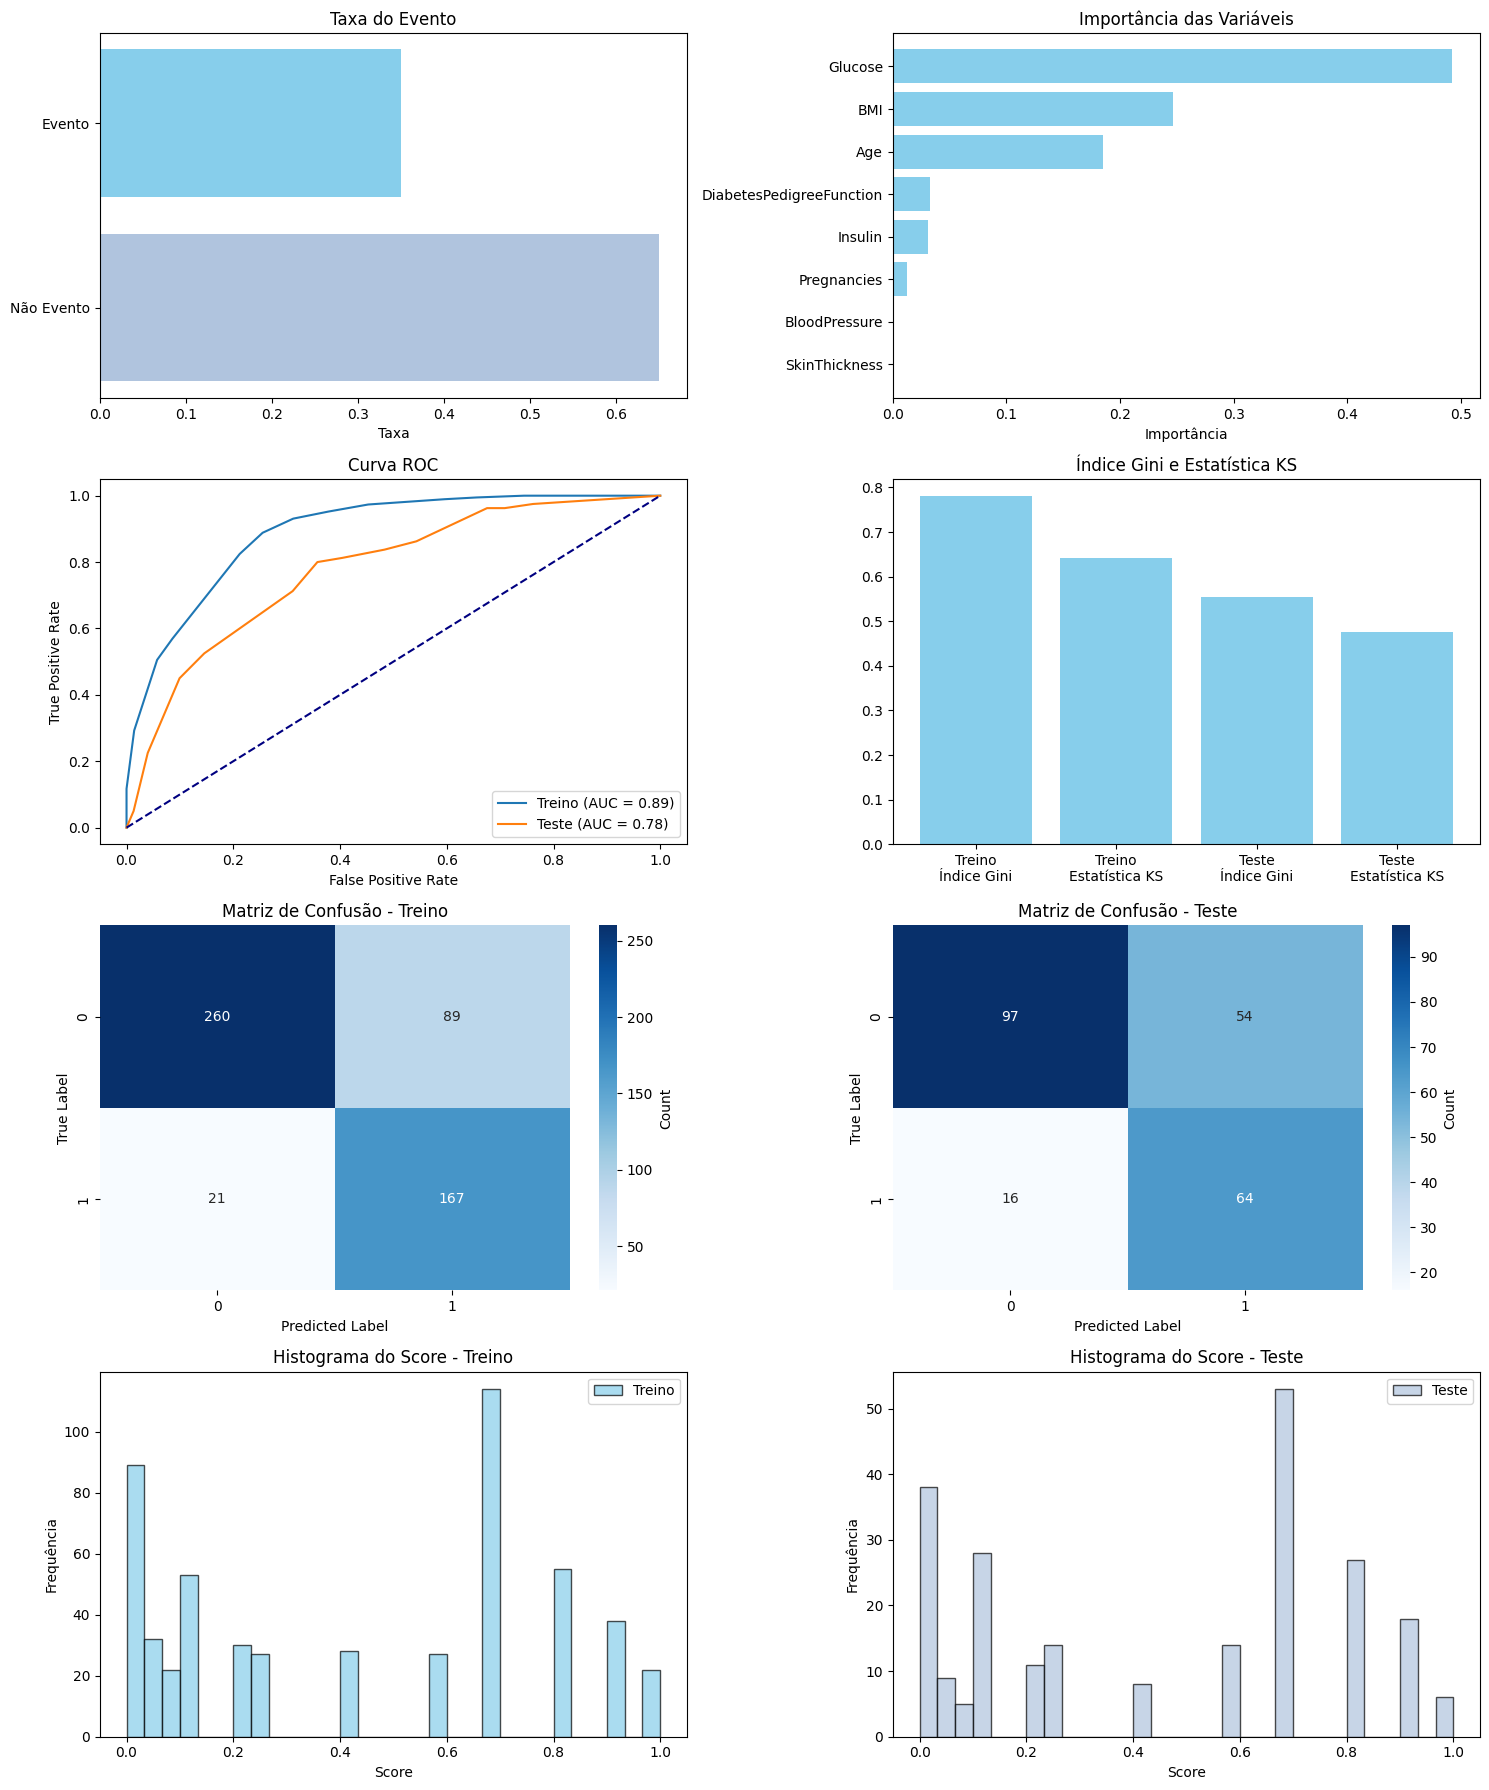

In [23]:
# Uso da função
features = np.array(X_train.columns)
plot_metrics(best_model_dt, X_train, y_train, X_test, y_test,features)

### **Escorando as tabelas com o melhor modelo sugerido pelo Grid Search**

In [24]:
# Vamos escorar a abt de treino e abt de teste
X_train['prediction_1'] = best_model_dt.predict_proba(X_train)[:, 1]
X_test['prediction_1'] = best_model_dt.predict_proba(X_test)[:, 1]


# Fazer o inner join pelo index
abt_train = X_train.join(abt_00[['Outcome']], how='inner')
abt_test = X_test.join(abt_00[['Outcome']], how='inner')
abt_train.shape,abt_test.shape

((537, 10), (231, 10))

In [25]:
def plot_event_rate(train_df, test_df, continuous_var, bins, target_var):
    plt.figure(figsize=(12,6))

    for i, df in enumerate([(train_df, 'Treino'), (test_df, 'Teste')], 1):
        df, label = df
        df['bin'] = pd.cut(df[continuous_var], bins=bins, labels=[f'Bin {i}' for i in range(1, bins + 1)])

        # Calculando a taxa de evento por bin
        event_rate = df.groupby('bin')[target_var].mean()

        # Plotando o gráfico de barras
        plt.subplot(1, 2, i)
        event_rate.plot(kind='bar', color='skyblue')
        plt.ylabel('Taxa de Evento')
        plt.xlabel('Bin')
        plt.title(f'Taxa de Evento por Bin de {continuous_var} - {label}')

    plt.tight_layout()
    plt.show()

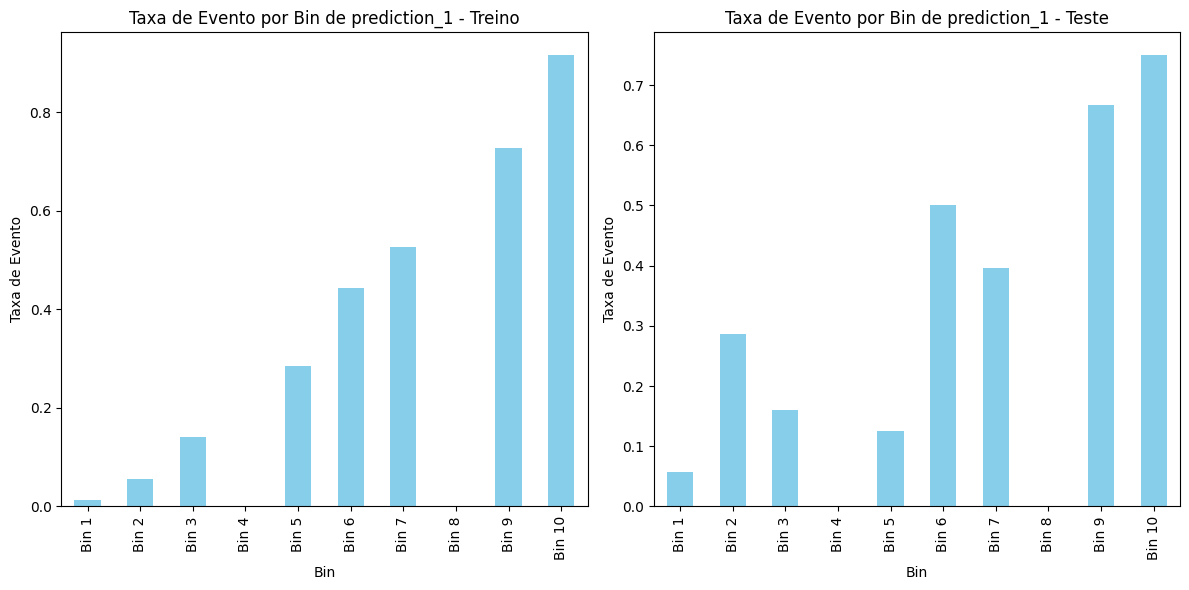

In [26]:
plot_event_rate(abt_train, abt_test, 'prediction_1', 10, 'Outcome')

### **Utilizando o dataframe COM feature selection**

In [27]:
# Separando as variáveis de entrada (features) e de saída (target)
X_diabetes = df_02.drop(columns=["Outcome"])
y_diabetes = df_02["Outcome"]

In [28]:
# Separando uma amostra de 70% para treinar o modelo e 30% para testar o modelo
# Holdout 70/30 (out-of-sample)

from sklearn.model_selection import train_test_split

# Dividindo os dados em conjunto de treinamento e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X_diabetes,
                                                    y_diabetes,
                                                    test_size=0.3,
                                                    random_state=42)
X_train.shape,X_test.shape

((537, 4), (231, 4))

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definindo o modelo
model = DecisionTreeClassifier(random_state=42)


############### Para lembrar os parâmetros da árvore ###########################
# model_dt = DecisionTreeClassifier(
#     criterion='gini',  # Critério utilizado para medir a qualidade de uma divisão ('gini' ou 'entropy').
#     splitter='best',  # Estratégia utilizada para escolher a divisão em cada nó ('best' ou 'random').
#     max_depth=3,  # Profundidade máxima da árvore. None significa que os nós serão expandidos até que todas as folhas sejam puras ou contenham menos amostras do que min_samples_split.
#     min_samples_split=0.2,  # Número mínimo de amostras necessárias para dividir um nó interno.
#     min_samples_leaf=1,  # Número mínimo de amostras necessárias para estar em um nó folha.
#     min_weight_fraction_leaf=0.0,  # Fração mínima ponderada do total da soma dos pesos necessária para estar em um nó folha.
#     max_features=None,  # Número de recursos a serem considerados ao procurar a melhor divisão.
#     random_state=None,  # Semente do gerador de números aleatórios utilizado para a tomada de decisões de divisão quando splitter == 'random'.
#     max_leaf_nodes=None,  # Número máximo de nós folha.
#     min_impurity_decrease=0.0,  # Um nó será dividido se a divisão induzir um decréscimo na impureza maior ou igual a este valor.
#     class_weight=None  # Peso das classes. Pode ser um dicionário de classes ou 'balanced'.
# )
################################################################################


# Definindo os parâmetros para o grid search
param_grid = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth': [2,3,4,7,10], # Profundidade máxima da árvore
    'min_samples_split': [0.008, 0.01,0.02,0.04,0.07, 0.1], # Número mínimo de amostras necessárias para dividir um nó interno.
    'min_samples_leaf': [0.008,0.02,0.04,0.07,0.1], # Número mínimo de amostras necessárias para estar em um nó folha.
    'max_leaf_nodes': [5, 10, 20, 50, 100],
    'min_impurity_decrease': [0.0001, 0.001, 0.01],
    'class_weight': ['balanced']
}

# Calculando a quantidade total de modelos que serão treinados
num_models = len(param_grid['splitter']) * len(param_grid['criterion']) * len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf']) * 5  # 5 é o número de folds na validação cruzada (cv)
print(f"Total de Modelos a serem Treinados: {num_models}")

# Definindo o objeto GridSearchCV
grid_01 = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    scoring='roc_auc',  # 'accuracy' 'precision' 'recall' 'f1'
                    n_jobs=-1)

# Treinando o modelo com o grid search
grid_01.fit(X_train, y_train)

# Exibindo os melhores parâmetros encontrados pelo grid search
print("Melhores Parâmetros: ", grid_01.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros
print("Melhor AUC: ", grid_01.best_score_)

# Utilizando o melhor modelo para fazer previsões
predictions = grid_01.best_estimator_.predict(X_test)

best_model_dt_01 = grid_01.best_estimator_

Total de Modelos a serem Treinados: 3000
Melhores Parâmetros:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 0.04, 'min_samples_split': 0.008, 'splitter': 'best'}
Melhor AUC:  0.8375495289339684


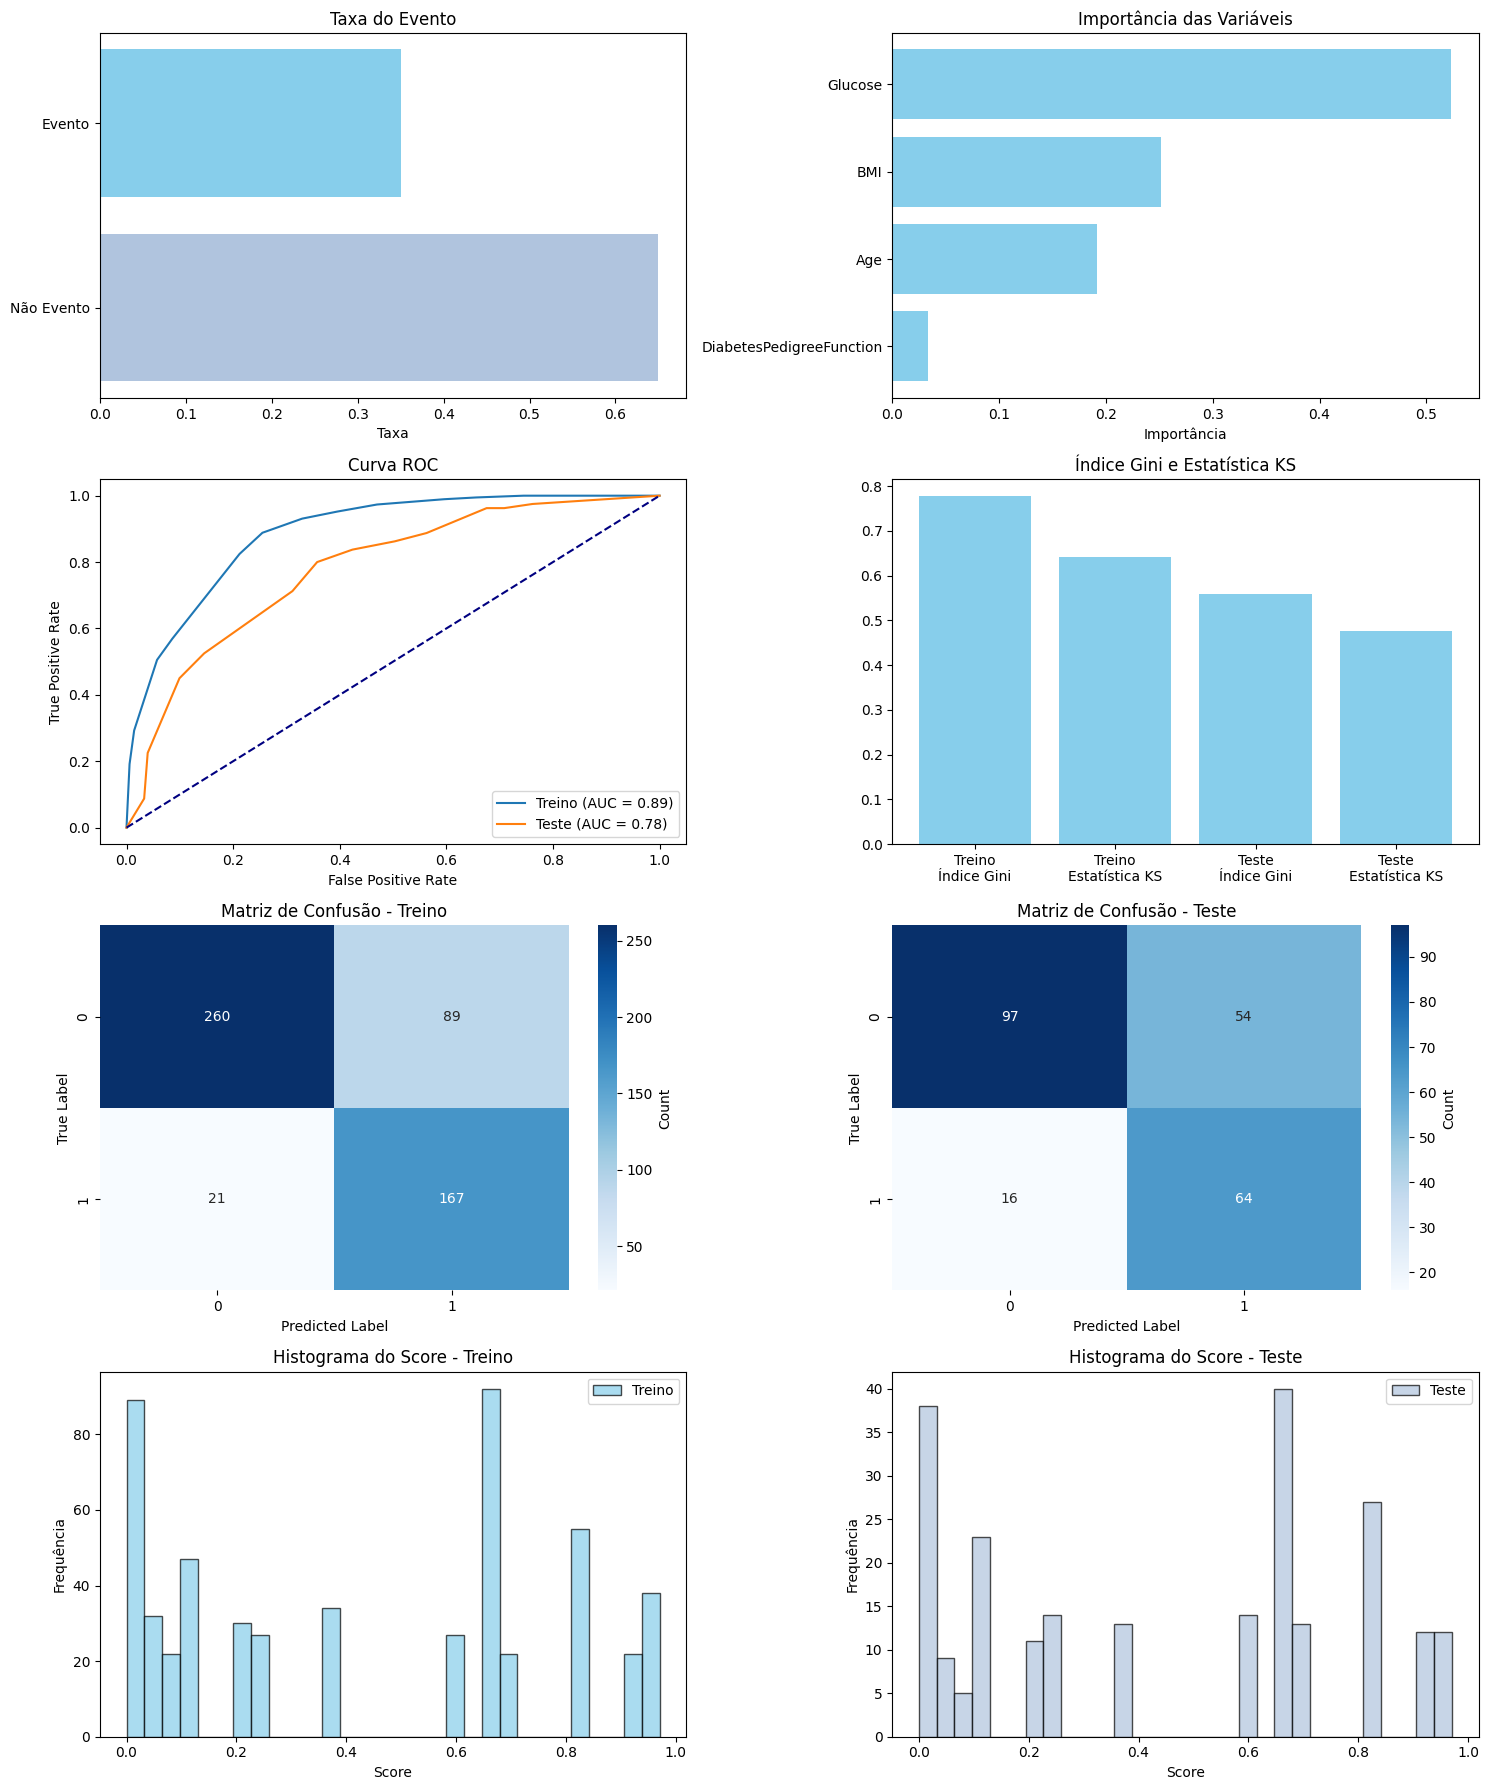

In [30]:
# Uso da função
features = np.array(X_train.columns)
plot_metrics(best_model_dt_01, X_train, y_train, X_test, y_test,features)

### **Escorando as tabelas**

In [31]:
# Vamos escorar a abt de treino e abt de teste
X_train['prediction_1'] = best_model_dt_01.predict_proba(X_train)[:, 1]
X_test['prediction_1'] = best_model_dt_01.predict_proba(X_test)[:, 1]


# Fazer o inner join pelo index
abt_train = X_train.join(abt_00[['Outcome']], how='inner')
abt_test = X_test.join(abt_00[['Outcome']], how='inner')
abt_train.shape,abt_test.shape

((537, 6), (231, 6))

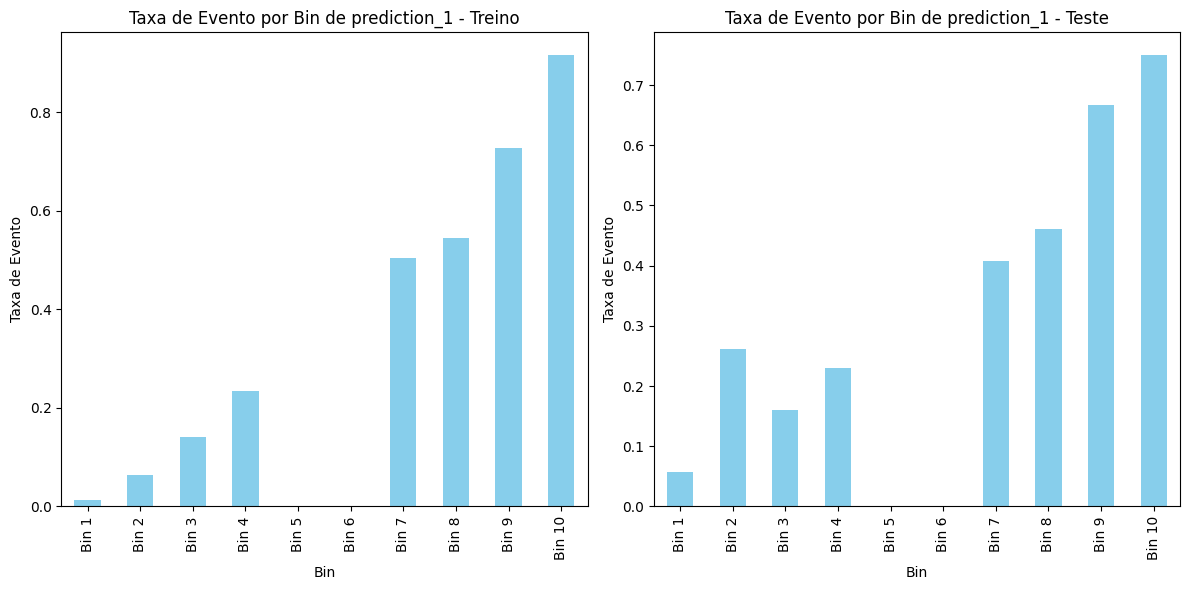

In [32]:
plot_event_rate(abt_train, abt_test, 'prediction_1', 10, 'Outcome')

In [35]:
print("Melhor AUC (Com feature selection): ", grid_01.best_score_)
print("Melhor AUC (Sem feature selection): ", grid.best_score_)

Melhor AUC (Com feature selection):  0.8375495289339684
Melhor AUC (Sem feature selection):  0.8374448754082622


#### Podemos verificar que utilizando a base sem feature selection ou com feature selection não faz uma diferença significativa no resultado final quando utilizamos o modelo de Decision Tree Classifier.

### **Salvando o melhor modelo**

In [33]:
from joblib import dump

# Salvando o melhor modelo encontrado pelo GridSearchCV
best_model = grid.best_estimator_
dump(best_model_dt, 'best_model_20250611.pkl')

['best_model_20250611.pkl']

### **Lendo um modelo salvo**

In [34]:
from joblib import load

# Carregando o modelo
loaded_model = load('best_model_20250611.pkl')

loaded_model

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, max_leaf_nodes=20,
                       min_impurity_decrease=0.0001, min_samples_leaf=0.04,
                       min_samples_split=0.008, random_state=42)